In [4]:
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
import os, shutil, glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Load data
### Make sure this file and original dataset in the same directory

In [5]:
# Directory in which we store our dataset

# Old dataset path
original_dataset_dir = './filtered'

# New dataset path
base_dir = './new_set'
# Create a new directory
os.mkdir(base_dir)   # comment this line it if you've run it

In [16]:
# Directory in which we store training, validation
# And Create directories of training and validation for normal and pneumonia respectively 

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)               # comment this line it if you've run it

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)          # comment this line it if you've run it


train_normal_dir = os.path.join(train_dir, 'NORMAL')
os.mkdir(train_normal_dir)        # comment this line it if you've run it

train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
os.mkdir(train_pneumonia_dir)     # comment this line it if you've run it

validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
os.mkdir(validation_normal_dir)   # ccomment this line it if you've run it

validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')
os.mkdir(validation_pneumonia_dir)# comment this line it if you've run it

In [7]:
# All jpeg data from old directory
imageList_normal = glob.glob(os.path.join( './filtered/NORMAL/', '*.jpeg'))
imageList_pneumonia = glob.glob(os.path.join( './filtered/PNEUMONIA/', '*.jpeg'))

# All jpeg data from new directories
imageList_train_normal = glob.glob(os.path.join( './new_set/train/NORMAL/', '*.jpeg'))
imageList_val_normal = glob.glob(os.path.join( './new_set/validation/NORMAL/', '*.jpeg'))

imageList_train_pneumonia = glob.glob(os.path.join( './new_set/train/PNEUMONIA/', '*.jpeg'))
imageList_val_pneumonia = glob.glob(os.path.join( './new_set/validation/PNEUMONIA/', '*.jpeg'))

In [ ]:
def is_file(fname_from,imageList):
    check=False
    for f in imageList: 
        fname_to = os.path.basename(f)
        if(fname_to == fname_from):
            check=True
    return check

In [ ]:

normal_cases_dir =  './filtered/NORMAL'     # Old normal path
pneumonia_cases_dir = './filtered/PNEUMONIA'# Old pneumonia path


LENTH_DATASET=len(imageList)                # total normal images (as the same as pneumonia images)

split_train_percent=int(LENTH_DATASET*0.8)   #0.8 for train data
split_val_percent=int(LENTH_DATASET-split_train_percent)  #0.2 for train data

count=0

# Split normal data into 80% train and 20% validation
for f in imageList_normal:
    count+=1    
    fname = os.path.basename(f)
    if(count<=split_train_percent and is_file(fname,imageList_train_normal)==False):
        src = os.path.join(normal_cases_dir, fname)
        dst = os.path.join(train_normal_dir, fname)
        shutil.copyfile(src, dst)
    elif(count>split_train_percent and is_file(fname,imageList_val_normal)==False):
        src = os.path.join(normal_cases_dir, fname)
        dst = os.path.join(validation_normal_dir, fname)
        shutil.copyfile(src, dst)
    
count=0

# Split pneumonia data into 80% train and 20% validation
for f in imageList_pneumonia:
    count+=1    
    fname = os.path.basename(f)
    if(count<=split_train_percent and is_file(fname,imageList_train_pneumonia)==False):
        src = os.path. join(pneumonia_cases_dir, fname)
        dst = os.path.join(train_pneumonia_dir, fname)
        shutil.copyfile(src, dst)
    elif(count>split_train_percent and is_file(fname,imageList_val_pneumonia)==False):
        src = os.path.join(pneumonia_cases_dir, fname)
        dst = os.path.join(validation_pneumonia_dir, fname)
        shutil.copyfile(src, dst)
        

In [8]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))

print('total training normal images:', len(os.listdir(validation_normal_dir)))
print('total training pneumonia images:', len(os.listdir(validation_pneumonia_dir)))

total training normal images: 1072
total training pneumonia images: 1072
total training normal images: 269
total training pneumonia images: 269


In [9]:
# Structure of directory

BRANCH = '├─'
LAST_BRANCH = '└─'
TAB = '│  '
EMPTY_TAB = '   '


def get_dir_list(path, placeholder=''):
    folder_list = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    file_list = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]
    result = ''
    for folder in folder_list[:-1]:
        result += placeholder + BRANCH + folder + '\n'
        result += get_dir_list(os.path.join(path, folder), placeholder + TAB)
    if folder_list:
        result += placeholder + (BRANCH if file_list else LAST_BRANCH) + folder_list[-1] + '\n'
        result += get_dir_list(os.path.join(path, folder_list[-1]), placeholder + (TAB if file_list else EMPTY_TAB))
    return result
if __name__ == '__main__':
    print(get_dir_list('./new_set'))

├─train
│  ├─NORMAL
│  └─PNEUMONIA
└─validation
   ├─NORMAL
   └─PNEUMONIA



## Data visualization

No Pneumonia


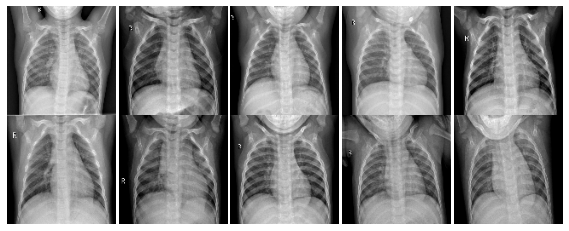

In [25]:
from glob import glob
import cv2
print("No Pneumonia")
multipleImages = glob('./new_set/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Pneumonia


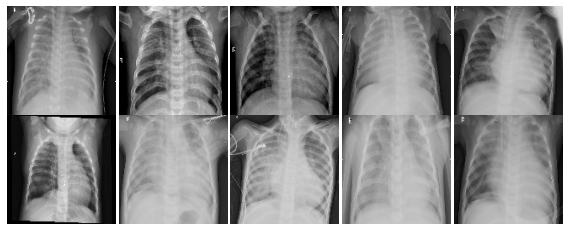

In [26]:
print("Pneumonia")
multipleImages = glob('./new_set/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## DataGenerator and Image augmentation

In [ ]:
image_width = 226
image_height = 226
batch=16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,fill_mode = 'nearest',
    
    channel_shift_range=13,data_format='channels_last',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch,
    color_mode='grayscale'
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=batch,#
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=(split_train_percent*2)//batch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=(split_val_percent*2)//batch)